# Gravity - Importing and processing a gravity survey to compute a Bouguer anomaly
O. Kaufmann, 2019-2021. Work in progress.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from bootsoff.gravity import corrections

## Import dataset

In [2]:
# importing a built-in dataset. Use bootsoff.gravity.instruments.import_cg6 to import a LRS CG6 file.
from bootsoff.data.gravity import profile as df

The imported dataset is stored as a pandas dataframe.  
It includes a geometry field that was programmed in the gravimeter or as been imported from a GNSS receiver

In [3]:
df

,Station_ID,InstrCorrGrav,StdDev,StdErr,Latitude,Longitude,Ellipsoid Height,InstrHeight,RMS Easting,RMS Elevation,RMS Northing,mask,geometry
datetime,,,,,,,,,,,,,
2019-12-09 06:52:12+00:00,1 - BASE_JONCQUOIS_02,4296.4051,0.1788,0.0327,50.445443,3.958254,75.189,0.0,0.0080,0.0204,0.0080,False,POINT (3.95825353703 50.44544330897001)
2019-12-09 06:52:42+00:00,1 - BASE_JONCQUOIS_02,4296.4063,0.0991,0.0181,50.445443,3.958254,75.189,0.0,0.0080,0.0204,0.0080,False,POINT (3.95825353703 50.44544330897001)
2019-12-09 06:53:12+00:00,1 - BASE_JONCQUOIS_02,4296.4068,0.1715,0.0313,50.445443,3.958254,75.189,0.0,0.0080,0.0204,0.0080,False,POINT (3.95825353703 50.44544330897001)
2019-12-09 07:32:17+00:00,1 - 225,4297.1063,0.2129,0.0389,50.429907,3.688630,64.656,0.0,0.0107,0.0238,0.0119,False,POINT (3.68862962157 50.42990663128001)
2019-12-09 07:32:47+00:00,1 - 225,4297.0937,0.1925,0.0352,50.429907,3.688630,64.656,0.0,0.0107,0.0238,0.0119,False,POINT (3.68862962157 50.42990663128001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19 14:05:25+00:00,1 - 317,4304.2391,0.1454,0.0265,50.462992,3.659931,62.741,0.0,0.0082,0.0208,0.0068,False,POINT (3.65993108962 50.46299167397)
2019-12-19 14:05:55+00:00,1 - 317,4304.2287,0.1375,0.0251,50.462992,3.659931,62.741,0.0,0.0082,0.0208,0.0068,False,POINT (3.65993108962 50.46299167397)
2019-12-19 14:21:45+00:00,1 - 332,4304.9160,0.1239,0.0226,50.466507,3.650911,62.297,0.0,0.0183,0.0537,0.0107,False,POINT (3.6509110203 50.46650696247)


## Define the Base station and get the base point

In [4]:
base_station = "1 - BASE_JONCQUOIS_02"

In [5]:
base_point = df.query('Station_ID=="%s"' %base_station).iloc[0,:]

## Apply corrections

Choose units among mgal, microgal and si 

In [6]:
units = 'mgal'

### Compute corrections

Instrument drift and terrain corrections have not been implemented yet...

In [8]:
corrections(df, base_point.name, units=units)

In [9]:
list_corr = ['LatCorr', 'AtmCorr', 'AltCorr', 'BougSphCapCorr', 'BougSlabCorr', 'TideCorr']

In [10]:
df[list_corr]

,LatCorr,AtmCorr,AltCorr,BougSphCapCorr,BougSlabCorr,TideCorr
datetime,,,,,,
2019-12-09 06:52:12+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-12-09 06:52:42+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000070
2019-12-09 06:53:12+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000141
2019-12-09 07:32:17+00:00,1.382146,-0.001038,-3.249397,1.194199,1.179367,-0.005881
2019-12-09 07:32:47+00:00,1.382146,-0.001038,-3.249397,1.194199,1.179367,-0.005958
...,...,...,...,...,...,...
2019-12-19 14:05:25+00:00,-1.560937,-0.001226,-3.840188,1.411316,1.393787,0.020647
2019-12-19 14:05:55+00:00,-1.560937,-0.001226,-3.840188,1.411316,1.393787,0.020532
2019-12-19 14:21:45+00:00,-1.873602,-0.001270,-3.977163,1.461656,1.443501,0.016666


### Plot corrections

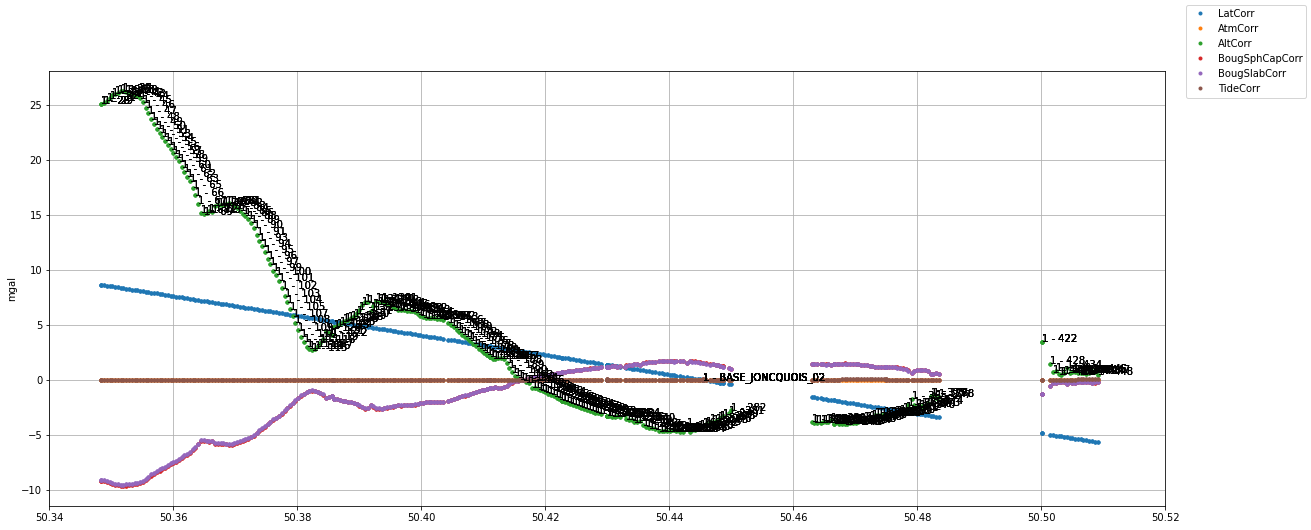

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
lat_lim = [50.34, 50.52]
for i in list_corr:
    ax.plot(df.Latitude, df[i], '.', label=i)
    for idx, row in df.iterrows():
        if (lat_lim[0]<=row.Latitude<=lat_lim[1]) and (i == 'AltCorr'):
            ax.text(row.Latitude, row[i], row['Station_ID'])
ax.set_xlim(lat_lim)
ax.set_ylabel(units)
ax.grid('on')
fig.legend()

### Apply corrections to the measurements

In [12]:
df['Bouguer'] = df['InstrCorrGrav']+df['LatCorr']+df['AtmCorr']+df['AltCorr']+df['BougSphCapCorr']+df['TideCorr']

### Display the effects of corrections

In time...

Text(0, 0.5, '[mGal]')

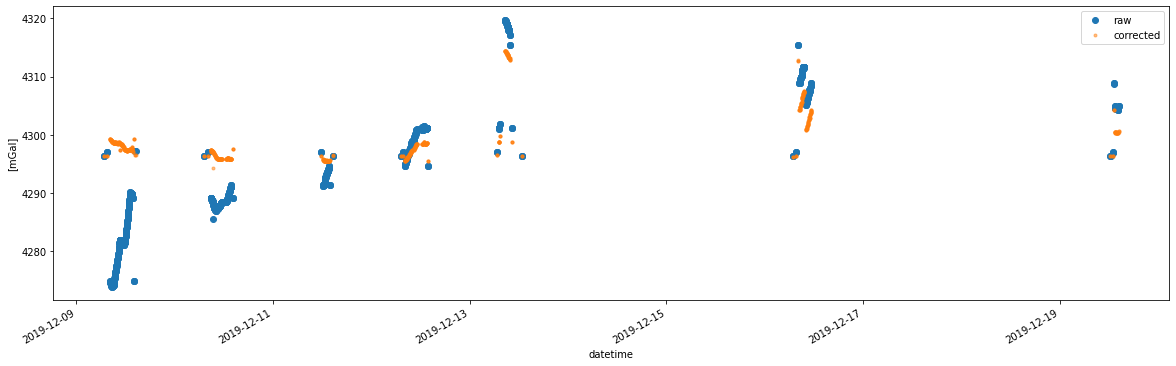

In [28]:
fig, ax = plt.subplots(nrows=1, figsize=(20,6))
df['InstrCorrGrav'].plot(marker='o', linestyle='none', label='raw')
df['Bouguer'].plot(marker='.', alpha=0.5, linestyle='none', label='corrected')
ax.legend()
ax.set_ylabel('[mGal]')

In space...

In [14]:
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'].apply(lambda x: shapely.wkt.loads(x)), crs='epsg:4326')

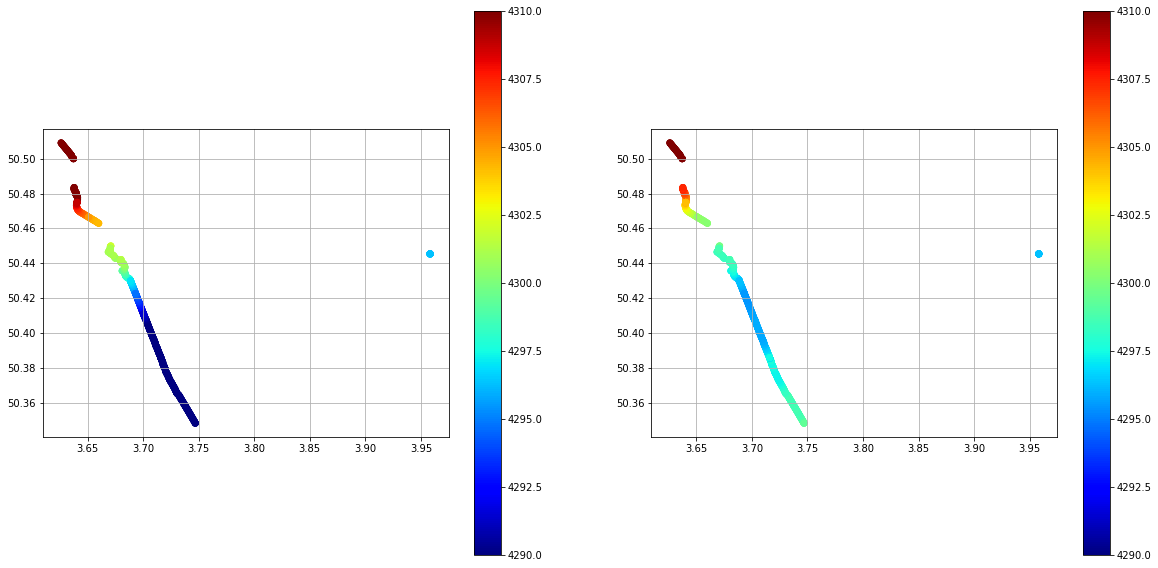

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
gdf.plot(column='InstrCorrGrav', ax=ax[0], vmin=4290., vmax=4310, cmap='jet', legend=True)
gdf.plot(column='Bouguer', ax=ax[1], vmin=4290., vmax=4310, cmap='jet', legend=True)
ax[0].grid('on')
ax[1].grid('on')